# Unsupervised Learning

In [151]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### 1. Clusters

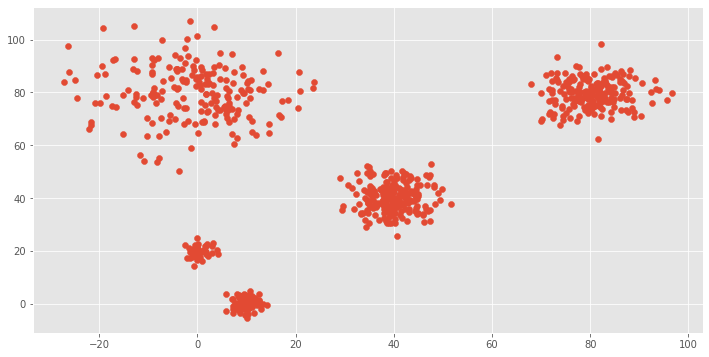

In [152]:
# Create Random Clusters
np.random.seed(1234)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,80],[[100,1],[1,100]], size=[200,])
X = np.concatenate((a,b,c,d,e),)
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1])
plt.show();

### 2. Hierarchical Clustering

In [153]:
# Import Libraries
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

# Tuned Dendrogram
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Hierarchical Clustering: Truncated Dendrogram")
        plt.xlabel("Dataset Index (or Cluster Size)")
        plt.ylabel("Distance")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

#### 2.1 Single Linkage

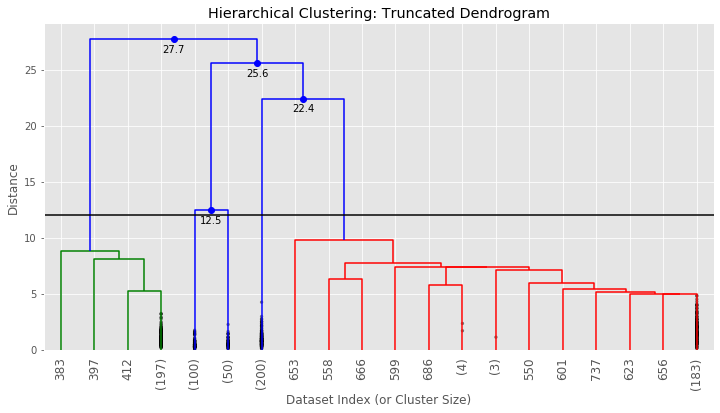

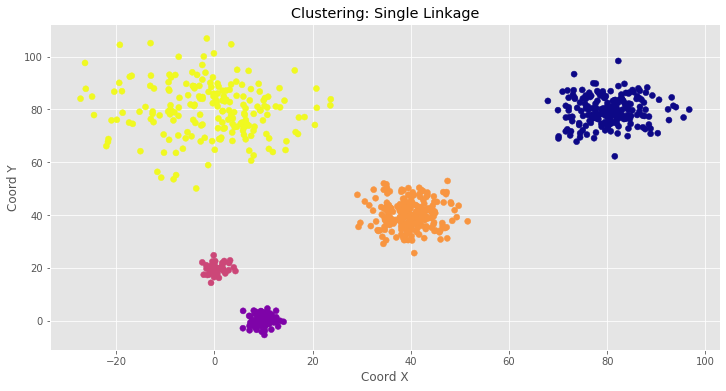

In [154]:
# Linkage Matrix
Z1 = linkage(X, "single")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z1,truncate_mode='lastp',p=20, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=12)
plt.show();

#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z1, k, criterion="maxclust")
# Distance Criterion
#max_d=12
#clusters = fcluster(Z, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Single Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

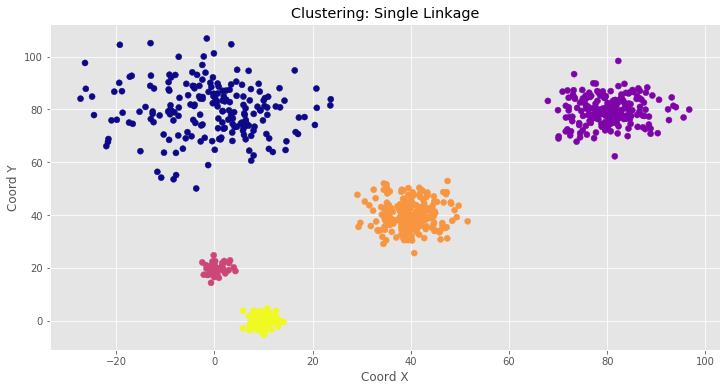

In [155]:
#######################################
####       Sklearn Method          ####
#######################################

from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=5,
                                     affinity='euclidean',
                                     memory=None,
                                     connectivity=None,
                                     compute_full_tree='auto',
                                     linkage='single',
                                     pooling_func='deprecated',).fit(X)

clustering 


clustering.labels_
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clustering.labels_, cmap="plasma")
plt.title("Clustering: Single Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

#### 2.2 Average Linkage

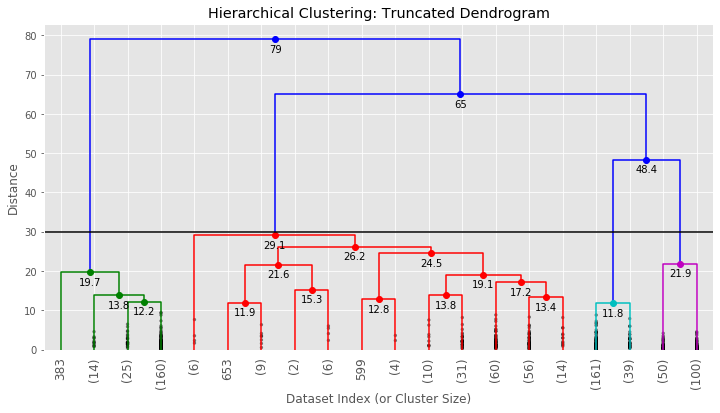

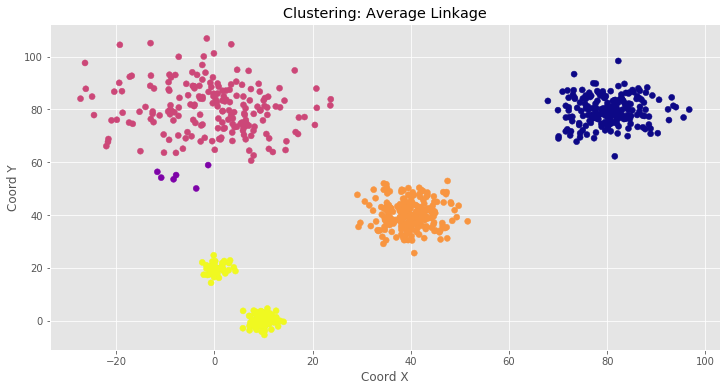

In [156]:
# Linkage Matrix
Z2 = linkage(X, "average")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z2,truncate_mode='lastp',p=20, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=30)
plt.show();
#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z2, k, criterion="maxclust")
# Distance Criterion
# max_d=30
# clusters = fcluster(Z2, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Average Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

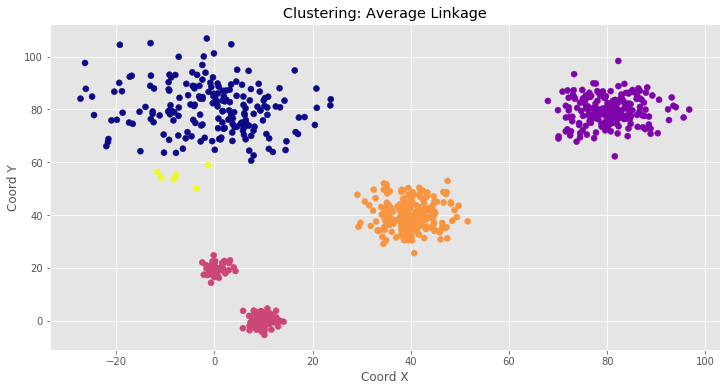

In [157]:
#######################################
####       Sklearn Method          ####
#######################################

from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=5,
                                     affinity='euclidean',
                                     memory=None,
                                     connectivity=None,
                                     compute_full_tree='auto',
                                     linkage='average',
                                     pooling_func='deprecated',).fit(X)

clustering 


clustering.labels_
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clustering.labels_, cmap="plasma")
plt.title("Clustering: Average Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

#### 2.3 Complete Linkage

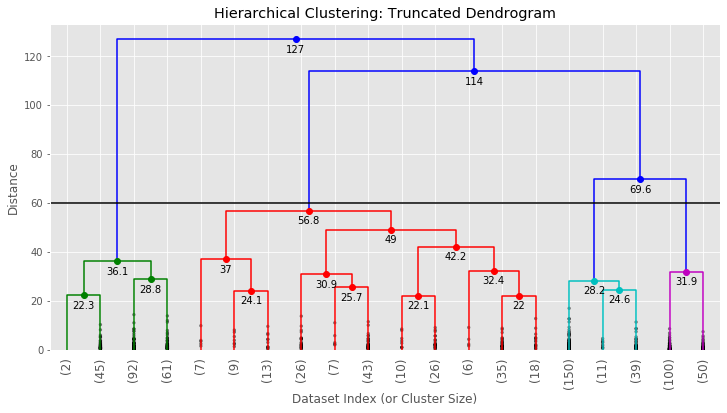

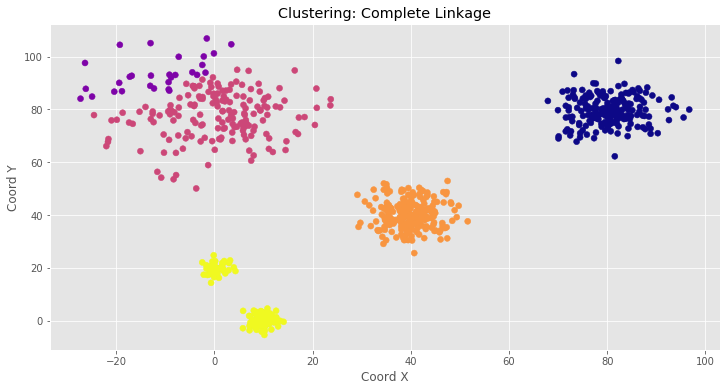

In [158]:
# Linkage Matrix
Z3 = linkage(X, "complete")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z3,truncate_mode='lastp',p=20, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=60)
plt.show();
#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z3, k, criterion="maxclust")
# Distance Criterion
# max_d=30
# clusters = fcluster(Z3, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Complete Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

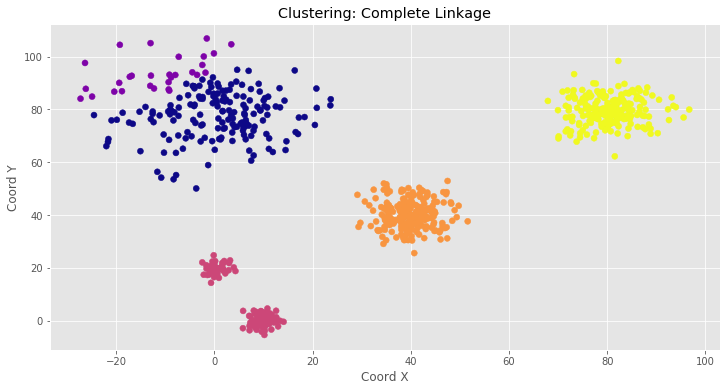

In [159]:
#######################################
####       Sklearn Method          ####
#######################################

from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=5,
                                     affinity='euclidean',
                                     memory=None,
                                     connectivity=None,
                                     compute_full_tree='auto',
                                     linkage='complete',
                                     pooling_func='deprecated',).fit(X)

clustering 


clustering.labels_
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clustering.labels_, cmap="plasma")
plt.title("Clustering: Complete Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

#### 2.4 Centroid Linkage

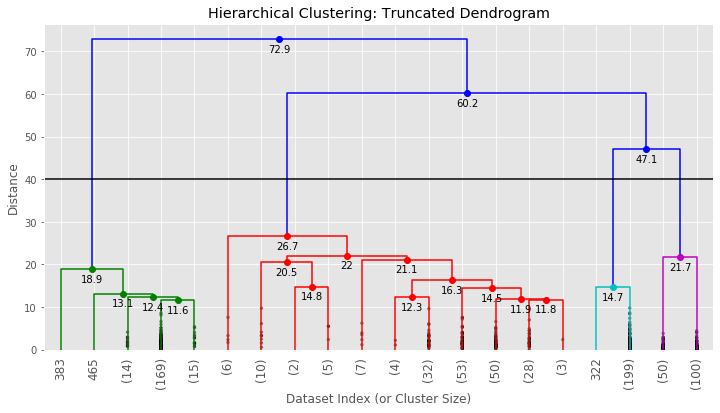

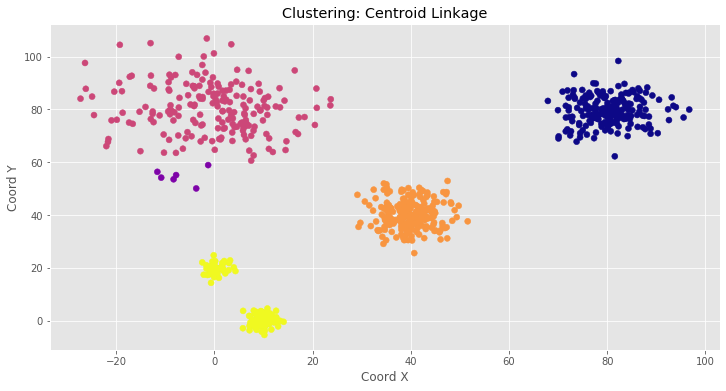

In [160]:
# Linkage Matrix
Z4 = linkage(X, "centroid")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z4,truncate_mode='lastp',p=20, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=40)
plt.show();
#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z4, k, criterion="maxclust")
# Distance Criterion
# max_d=30
# clusters = fcluster(Z4, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Centroid Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

#### 2.5 Ward Linkage

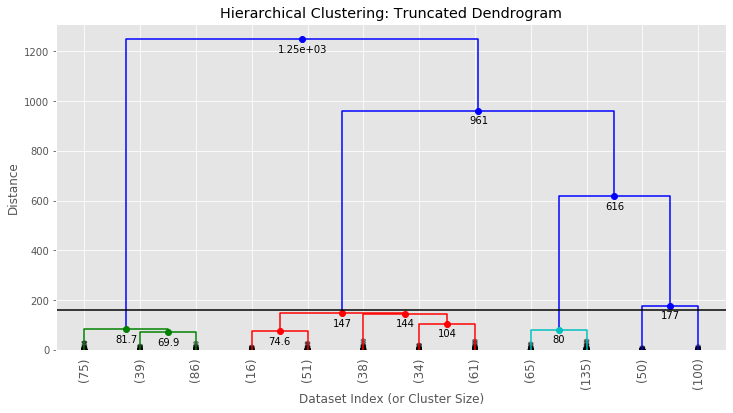

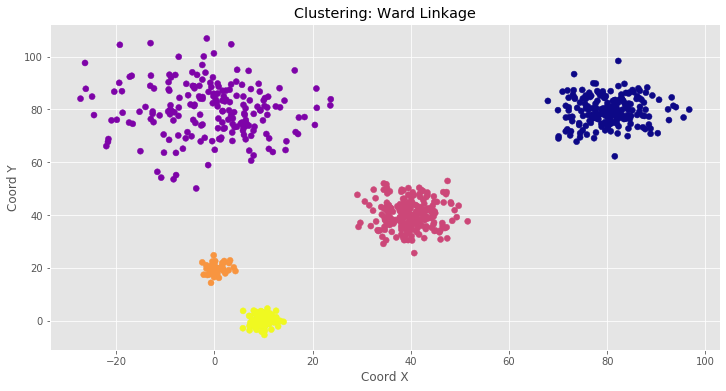

In [161]:
# Linkage Matrix
Z5 = linkage(X, "ward")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z5,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=160)
plt.show();
#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z5, k, criterion="maxclust")
# Distance Criterion
# max_d=30
# clusters = fcluster(Z5, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Ward Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

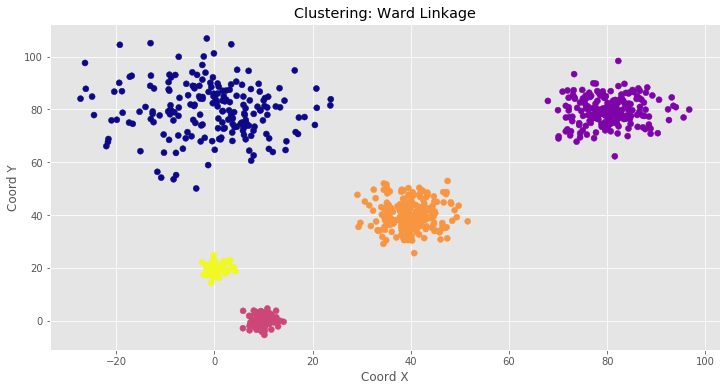

In [162]:
#######################################
####       Sklearn Method          ####
#######################################

from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=5,
                                     affinity='euclidean',
                                     memory=None,
                                     connectivity=None,
                                     compute_full_tree='auto',
                                     linkage='ward',
                                     pooling_func='deprecated',).fit(X)

clustering 


clustering.labels_
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clustering.labels_, cmap="plasma")
plt.title("Clustering: Ward Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();